# 2603646_DataVisualization

---
* Author:  [Yuttapong Mahasittiwat]
* StudentID: 6780330426
---

Source: [medium](https://medium.com/@sumeirwalia/covid-19-data-visualization-100f6be3f00e)

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt
print("pandas version :",pd.__version__)
print("numpy version :",np.__version__)
print("matplotlib version :",mpl.__version__)
print("seaborn version :",sns.__version__)
print("altair version :",alt.__version__)

pandas version : 2.2.1
numpy version : 1.26.4
matplotlib version : 3.8.4
seaborn version : 0.13.2
altair version : 5.4.0


In [5]:
dataset_url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df=pd.read_csv(dataset_url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [6]:
df['Country'].nunique()

198

In [7]:
df = df.sort_values(by=['Country', 'Date'])
df['InfectionRate'] = df.groupby('Country')['Confirmed'].diff()
df

,Date,Country,Confirmed,Recovered,Deaths,InfectionRate
0,2020-01-22,Afghanistan,0,0,0,NaN
1,2020-01-23,Afghanistan,0,0,0,0.0
2,2020-01-24,Afghanistan,0,0,0,0.0
3,2020-01-25,Afghanistan,0,0,0,0.0
4,2020-01-26,Afghanistan,0,0,0,0.0
...,...,...,...,...,...,...
161563,2022-04-12,Zimbabwe,247094,0,5460,84.0
161564,2022-04-13,Zimbabwe,247160,0,5460,66.0
161565,2022-04-14,Zimbabwe,247208,0,5462,48.0
161566,2022-04-15,Zimbabwe,247237,0,5462,29.0


In [8]:
df_top = df.groupby(by='Country').agg({'InfectionRate': 'max'})\
                            .nlargest(20,columns='InfectionRate')\
                            .sort_values(by='InfectionRate',ascending= False)\
                            .reset_index()

In [9]:
df_top

,Country,InfectionRate
0,US,1383795.0
1,United Kingdom,848169.0
2,Turkey,823225.0
3,"Korea, South",621317.0
4,Germany,527487.0
5,France,503349.0
6,Vietnam,454212.0
7,India,414188.0
8,Netherlands,380498.0
9,Spain,372766.0


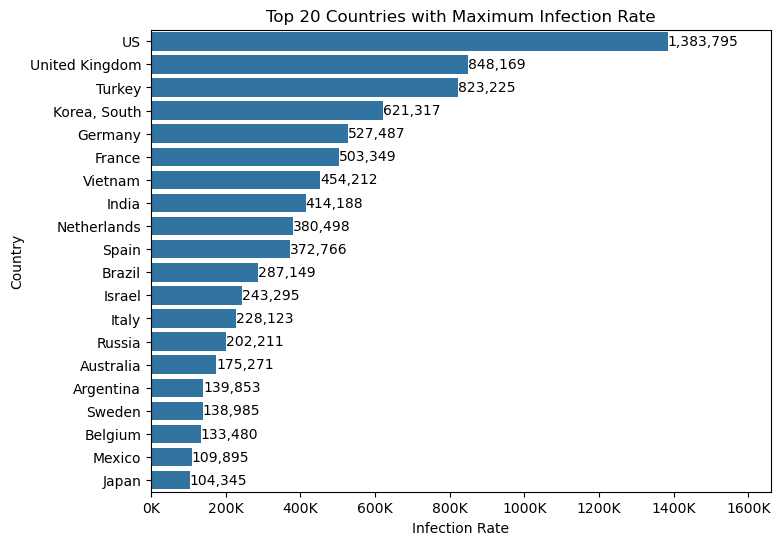

In [15]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8,6))

ax = sns.barplot(x='InfectionRate',y='Country', data=df_top)

for index, value in enumerate(df_top['InfectionRate']):
    ax.text(value, index, f'{value:,.0f}', va='center', ha='left', fontsize=10)
    
ax.set_title('Top 20 Countries with Maximum Infection Rate')
ax.set_xlabel('Infection Rate')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

max_value = df_top['InfectionRate'].max()
ax.set_xlim(0, max_value * 1.2)

plt.savefig('../figure/Top20Country.png',bbox_inches='tight');
plt.show();

## Alternative : use Altair

In [40]:
chart = alt.Chart(df_top).mark_bar().encode(
    alt.X('InfectionRate'),
    alt.Y('Country',sort=alt.SortField('InfectionRate', order='descending')),
    alt.Tooltip('InfectionRate:Q')
)
chart

alt.Chart(...)